In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
# warning given for tensorflow usage because it can be not available in fututre updates
import tensorflow as tf
import os, glob
import cv2
from tqdm.notebook import tqdm # new replacement
#from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D,BatchNormalization
from keras.layers import Flatten

In [19]:
mildDemented = "C:/Users/azhar/Documents/AugmentedAlzheimerDataset/MildDemented"
moderateDemented = "C:/Users/azhar/Documents/AugmentedAlzheimerDataset/ModerateDemented"
nonDemented = "C:/Users/azhar/Documents/AugmentedAlzheimerDataset/NonDemented"
veryMildDemented = "C:/Users/azhar/Documents/AugmentedAlzheimerDataset/VeryMildDemented"

files_in_mild = os.listdir(mildDemented)
files_in_moderate = os.listdir(moderateDemented)
files_in_non = os.listdir(nonDemented)
files_in_veryMild = os.listdir(veryMildDemented)

## open each folder and be like mild demented, demented, non demented

In [20]:
#create a list to hold the images and labels
data = [] #data -> x
labels = [] # label -> y

# Append all the images and labels to the arrays
os.chdir("C:/Users/azhar/Documents/AugmentedAlzheimerDataset/NonDemented")
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(224,224))
  data.append(img)
  labels.append("NonDemented")

os.chdir("C:/Users/azhar/Documents/AugmentedAlzheimerDataset/VeryMildDemented")
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(224,224))
  data.append(img)
  labels.append("VeryMildDemented")

os.chdir("C:/Users/azhar/Documents/AugmentedAlzheimerDataset/MildDemented")
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(224,224))
  data.append(img)
  labels.append("MildDemented")

os.chdir("C:/Users/azhar/Documents/AugmentedAlzheimerDataset/ModerateDemented")
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(224,224))
  data.append(img)
  labels.append("ModerateDemented")

print(labels)

  0%|          | 0/9600 [00:00<?, ?it/s]

  0%|          | 0/8960 [00:00<?, ?it/s]

  0%|          | 0/8960 [00:00<?, ?it/s]

  0%|          | 0/6464 [00:00<?, ?it/s]

['NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemen

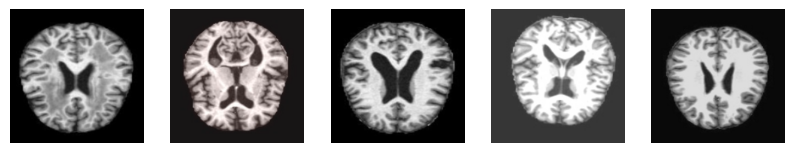

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(data[i], cmap="gray")
  plt.axis('off')
plt.show()

In [22]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state = 42)
print("Shape of an image in data train: ", data_train[0].shape)
print("Shape of an image in data test: ", data_test[0].shape)

Shape of an image in data train:  (224, 224, 3)
Shape of an image in data test:  (224, 224, 3)


In [23]:
le = preprocessing.LabelEncoder()
labels_train = le.fit_transform(labels_train)
labels_test = le.fit_transform(labels_test)

In [24]:
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes = 4)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes = 4)
labels_train = np.array(labels_train)
data_train = np.array(data_train)
labels_test = np.array(labels_test)
data_test = np.array(data_test)

In [25]:
print("data_train Shape: ", data_train.shape)
print("data_test Shape: ", data_test.shape)
print("labels_train Shape: ", labels_train.shape)
print("labels_test Shape: ", labels_test.shape)

data_train Shape:  (23788, 224, 224, 3)
data_test Shape:  (10196, 224, 224, 3)
labels_train Shape:  (23788, 4)
labels_test Shape:  (10196, 4)


In [26]:
from keras.applications import vgg16

img_rows, img_cols = 224, 224

vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top= False,
                  input_shape = (img_rows, img_cols, 3))
for layer in vgg.layers:
  layer.trainable = False

for (i,layer) in enumerate(vgg.layers):
  print(str(i) + " " + layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [16]:
def lw(bottom_model, num_classes):
  """creates the top or head of the model that will be placed ontop of the bottom layers"""

  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(512, activation='relu')(top_model)
  top_model = Dense(num_classes, activation='softmax')(top_model)
  return top_model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Reshape

from keras.models import Model

num_classes = 4

FC_Head = lw(vgg,4)
# flattened_layer = Flatten()(FC_Head)
# dense_layer = Dense(32)(flattened_layer)  # Adjust the number of units as needed
# reshaped_output = Reshape((4, 2, 4))(dense_layer)


model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [44]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
history = model.fit(data_train, labels_train,
                    epochs = 5,
                    verbose = 1,
                    initial_epoch=0)

{'loss': [0.8419027328491211, 0.5643541216850281, 0.45476022362709045, 0.3611146807670593, 0.3147771954536438], 'accuracy': [0.636917769908905, 0.7513872385025024, 0.8057844042778015, 0.8496300578117371, 0.872246503829956]}


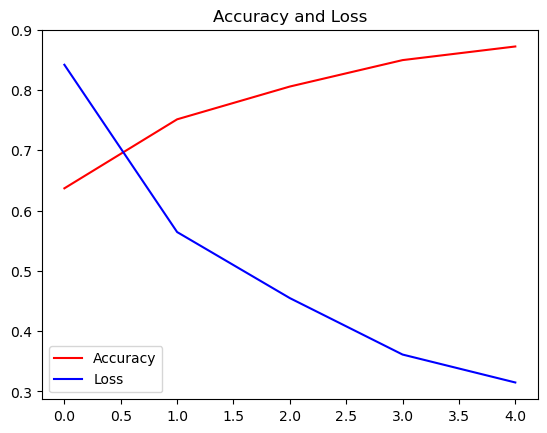

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Accuracy")
plt.plot(epochs, loss, 'b', label="Loss")
plt.title('Accuracy and Loss')
plt.legend(loc=0)
plt.figure()

plt.show()